In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import rcParams
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import paired_distances
sns.set()
# figure size in inches
rcParams['figure.figsize'] = 7, 5

# Cluster Heatmap

In [25]:
# Modify these values to generate different heatmaps
heatmap_n_samples = 100
heatmap_cluster_std = 0.1
heatmap_centers = [[0, 0], [1, 1], [2, 0]]

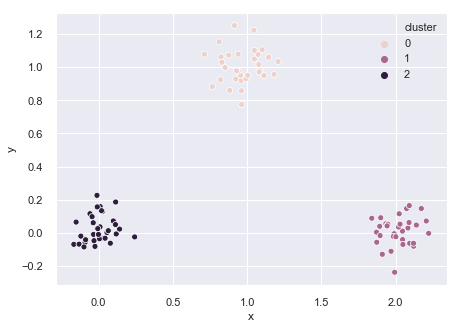

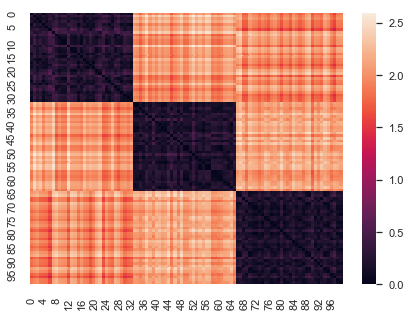

In [26]:
# Create dataset and cast into a dataframe
X, y = make_blobs(n_samples=heatmap_n_samples, n_features=2, centers=heatmap_centers, 
                  cluster_std=heatmap_cluster_std, random_state=5)
X = pd.DataFrame(X, columns=['x', 'y'])


# Run Kmeans and sort the points according to the cluster labels
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
X = X.sort_values('cluster')

# Create a distance matrix of the points
dist_mat = pd.DataFrame(manhattan_distances(X[['x', 'y']], X[['x', 'y']]))


# Plot the clusters
sns.scatterplot(x='x', y='y', data=X, hue='cluster')
plt.show()


# Plot a heatmap
sns.heatmap(dist_mat)
plt.show()

# Finding the number of clusters in a dataset

In [27]:
# Modify these values 
n_samples = 100
centers = 5
k_min = 2
k_max = 10

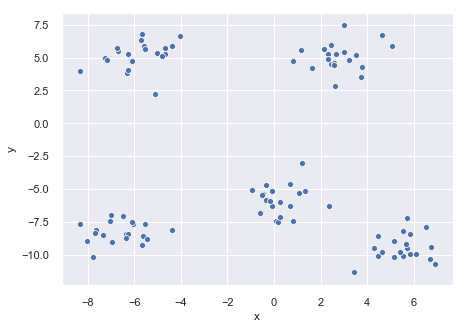

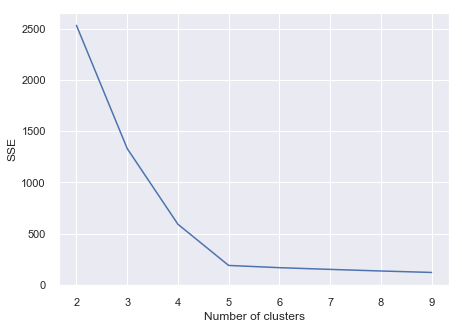

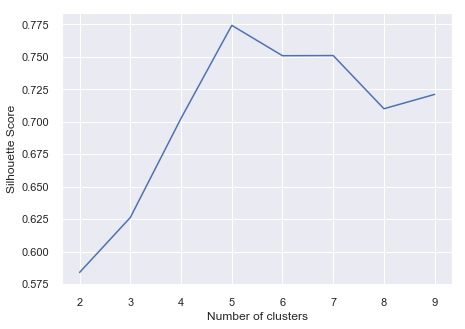

In [28]:
# Create dataset and cast into a dataframe
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=centers, random_state=10)
X = pd.DataFrame(X, columns=['x', 'y'])

# Plot the clusters
sns.scatterplot(x='x', y='y', data=X)
plt.show()

# Run Kmeans and sort the points according to the cluster labels
sse = {}
sil = {}
for k in range(k_min, k_max):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sil[k] = silhouette_score(X, kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()